# Laboratorio 4: Programación Lineal Mixta (MA4702, otoño 2023)

Fecha: 31 de Mayo, 2023.<br/>
Profesor: Marcos Kiwi.<br/>
Auxiliares: Benjamín Jauregui y Cristián Palma.<br/>

## Preliminares

Este laboratorio consta de 2 etapas. Una Tarea Introductoria (TI) y una etapa de Trabajo Presencial (TP). La nota global del laboratorio será 40 % (TI) + 60 % (TP).

La tarea introductoria es de carácter estrictamente individual. La etapa presencial es de carácter grupal. 


## Laboratorio 4: Tarea Introductoria (TI)

## Instrucciones

* La respuesta a esta tarea consiste en completar este mismo archivo `.ipnyb` y entregarlo a través de Tareas en UCursos, antes de las **14:15 del miércoles 31 de mayo de 2023** (Se descontará 1.0 pts. por cada 15 minutos o fracción de atraso.)

* Realice esta primera tarea de manera **individual**. Bajo ningún motivo discuta sus respuestas, ni comparta o deje a disposición los archivos con sus compañeros. Se hará un estudio de similitudes entre los archivos resultantes para detectar posibles plagios.

<div class="alert alert-block alert-warning">
    Advertencia: Si en el archivo que entregue alguna de las celdas arroja un mensaje de error al ejecutar, o el código entra en un loop infinito y no retorna con ninguna salida, Ud. deberá agregar una nota al respecto, explicando cuál cree que es el problema. Si no lo hace, se le penalizará adicionalmente.               
</div>


## Datos personales

<div class="alert alert-block alert-success">
Indique su nombre: Miguel Escobar<br/>              
</div>


## Introducción: *Uncapacitated Facility Location (UFL)*

El objetivo de esta tarea es familiarizarse con el problema denominado *Uncapacitated Facility Location*, establecer algunos resultados preliminares que permiten abordarlo a través del método de relajación Lagrangiana, e implementar algunas rutinas para resolverlo computacionalmente. 


En el problema UFL, un conjunto de clientes $\mathcal C$ debe ser servido desde un conjunto potencial de localizacones $\mathcal L$. 
El costo de habilitar la localización $\ell\in\mathcal L$ es $f_{\ell}\geq 0$ mientras que la utilidad de servir al cliente $c\in\mathcal C$ desde $\ell\in\mathcal L$ es $u_{c,\ell}\in\mathbb{R}$.
Se quiere maximizar la utilidad sujeto a servir a todos los clientes, es decir, se quiere determinar:
$$
\begin{array}{rlll}
(UFL):\  z_{UFL} = & \max_{x, y} \sum_{c\in\mathcal C}\sum_{\ell\in\mathcal L}u_{c,\ell}y_{c,\ell}-\sum_{\ell\in\mathcal L} f_\ell x_\ell \\
\text{s.a.} & \sum_{\ell\in\mathcal{L}}y_{c,\ell} = 1, & \forall c\in\mathcal C, \\
& y_{c,\ell} \leq x_{\ell}, & \forall c\in\mathcal C, \forall \ell\in\mathcal{L}, \\
& y_{c,\ell}\geq 0, & \forall c\in\mathcal{C}, \forall \ell\in\mathcal{L}, \\
& x_{\ell}\in\{0,1\}, & \forall \ell\in\mathcal{L}.
\end{array}
$$

Las variables $x_\ell$ indican si la localización $\ell$ está o no habilitada, y las variables $y_{c,\ell}$ si el cliente $c$ es servido o no desde la localización $\ell$. La primera familia de restricciones representa que cada cliente debe ser servido desde cierta localización. La segunda colección de restricciones indica que un cliente puede ser servido solo desde una localización habilitada.

## Ejercicio 1

1a) Para $x\in\{0,1\}^{\mathcal L}$, se define:

$$
\begin{array}{rrlll}
 (UFL_x): & z_{UFL}(x) = & \max_{y} \sum_{c\in\mathcal C}\sum_{\ell\in\mathcal L}u_{c,\ell}y_{c,\ell}-\sum_{\ell\in\mathcal L} f_\ell x_\ell \\
& \text{s.a.} & \sum_{\ell\in\mathcal{L}}y_{c,\ell} = 1, & \forall c\in\mathcal C, \\
& & y_{c,\ell} \leq x_{\ell}, & \forall c\in\mathcal C, \forall \ell\in\mathcal{L}, \\
& & y_{c,\ell}\geq 0, & \forall c\in\mathcal{C}, \forall \ell\in\mathcal{L}.
\end{array}
$$

Pruebe que 

$$
z_{UFL}(x) = \sum_{c\in\mathcal C}\max_{\ell\in\mathcal L:x_\ell=1} u_{c,\ell} - \sum_{\ell\in\mathcal L : x_\ell=1} f_{\ell}.
$$

<div class="alert alert-block alert-warning">
Respuesta Ejercicio 1a: 

Como $x_{\ell}\in\{0,1\}$, el término $\sum_{\ell\in\mathcal L} f_\ell x_\ell = \sum_{\ell\in\mathcal L : x_\ell=1} f_{\ell}$. Ahora, suponiendo por contradicción que $\max_{y} \sum_{c\in\mathcal C}\sum_{\ell\in\mathcal L}u_{c,\ell}y_{c,\ell} \neq \sum_{c\in\mathcal C}\max_{\ell\in\mathcal L:x_\ell=1} u_{c,\ell}$  (con las restricciones asociadas), esto es, existe al menos 1 término $y_{\tilde{c}, \tilde{\ell}}$ no nulo multiplicando una utilidad no máxima en la sumatoria. El hecho que $y_{c,\ell} \leq x_{\ell}, \forall c\in\mathcal C, \forall \ell\in\mathcal{L}$ nos restringe a que la locación $\tilde{\ell}$ debe estar habilitada ($x_{\tilde{\ell}}) = 1$), de lo contrario $y_{\tilde{c}, \tilde{\ell}}$ sería 0. Con esto, podemos mejorar la solución como sigue:

1) Encontramos $\ell_{max}$ tal que $u_{\tilde{c}, \ell_{max}} := \max_{\ell\in\mathcal L:x_\ell=1} u_{\tilde{c},\ell}$. Inicializamos nuestro nuevo vector solución $\tilde{y}$ como igual a $y$.

2) A $\tilde{y}_{\tilde{c}, \ell_{max}}$ le sumamos el valor de $y_{\tilde{c}, \tilde{\ell}}$.

3) Fijamos $\tilde{y}_{\tilde{c}, \tilde{\ell}} = 0$.

Notemos que seguimos respetando todas las restricciones, pues $\tilde{y}_{\tilde{c}, \ell_{max}} = y_{\tilde{c}, \ell_{max}} + y_{\tilde{c}, \tilde{\ell}} \leq \sum_{\ell\in\mathcal{L}}y_{\tilde{c},\ell} = 1 = x_{\ell_{max}}$ y no alteramos la restricción $\sum_{\ell\in\mathcal{L}}\tilde{y}_{\tilde{c},\ell} = 1$, pues sólo movimos un valor de lugar. Sin embargo, nuestro valor en la función objetivo es mayor, pues $\sum_{c\in\mathcal C}\sum_{\ell\in\mathcal L}u_{c,\ell}\tilde{y}_{c,\ell} = \sum_{c\in\mathcal C}\sum_{\ell\in\mathcal L}u_{c,\ell}y_{c,\ell} + (u_{\tilde{c}, \ell_{max}} - u_{\tilde{c}, \tilde{\ell}})y_{\tilde{c}, \tilde{\ell}} \geq \sum_{c\in\mathcal C}\sum_{\ell\in\mathcal L}u_{c,\ell}y_{c,\ell}$ gracias a que $u_{\tilde{c}, \ell_{max}} - u_{\tilde{c}, \tilde{\ell}} \geq 0$ y $y_{\tilde{c}, \tilde{\ell}} \geq 0$. Esto contradice que $y$ maximiza la función objetivo, con lo que concluímos lo pedido.

</div>


1b) Sea $\mu\in\mathbb{R}^{\mathcal C}$ y considere la siguiente relajación Lagrangiana de $(UFL)$, 

$$
\begin{array}{rrll}
(LR_{\mu}): & z_{LR}(\mu) = & \max_{x,y}\sum_{c\in\mathcal C}\sum_{\ell\in\mathcal L} (u_{c,\ell}-\mu_c)y_{c,\ell}-\sum_{\ell\in\mathcal L}f_{\ell}x_{\ell}+\sum_{c\in\mathcal C}\mu_c, \\
& \text{s.a.} & 0\leq y_{c,\ell}\leq x_{\ell}, & \forall c\in\mathcal C, \forall \ell\in\mathcal L. \\
& & x_l \in \{0, 1\},  & \forall \ell\in\mathcal{L}.
\end{array}
$$

En lo que sigue, para $a\in\mathbb{R}$, denotamos $\max\{a,0\}$ por $(a)^+$.

Pruebe que se tienen las siguientes afirmaciones:
1. $z_{LR}(\mu) = \sum_{\ell\in\mathcal L}\big(\sum_{c\in\mathcal C} (u_{c,\ell}-\mu_{c})^+-f_{\ell}\big)^+ + \sum_{c\in\mathcal C}\mu_c$.

2. Un subgradiente $s\in\mathbb{R}^{\mathcal C}$ de $z_{LR}(\mu)$ en $\mu=\mu^0\in\{0,1\}^{\mathcal{C}}$ está dada por $s_c=1-\sum_{l\in\mathcal{L}}y_{c,\ell}(\mu^0)$ para $c\in\mathcal C$, donde:

$$
y_{c,\ell}(\mu^0) = \begin{cases}
1, & \text{si $u_{c,\ell}>\mu^0_c$ y $\sum_{c\in\mathcal{C}}(u_{c,\ell}-\mu^0_c)^+> f_\ell$}, \\
0, & \text{si no.}
\end{cases}
$$

<div class="alert alert-block alert-warning">
Respuesta Ejercicio 1b: 

1) Notemos que los únicos valores que le conviene tomar a $y_{c, \ell}$ son $0$ y $x_\ell$, cualquier otro valor intermedio puede incrementarse moviendo $y_{c, \ell}$ a $0$ si $(u_{c,\ell}-\mu_c) < 0$, o bien a $x_\ell$ si $(u_{c,\ell}-\mu_c) \geq 0$. Si $(u_{c,\ell}-\mu_c) = 0$ no hace diferencia el valor de $y_{c, \ell}$, por lo que SPG supondremos que es o bien $0$ o bien $x_\ell$. Llevar a cabo este proceso corresponde a la maximización sobre $y$ y nos deja con la siguiente función objetivo:

$$
\begin{array}{rrll}
(LR_{\mu}): & z_{LR}(\mu) = & \max_{x}\sum_{c\in\mathcal C}\sum_{\ell\in\mathcal L} (u_{c,\ell}-\mu_c)^+x_\ell-\sum_{\ell\in\mathcal L}f_{\ell}x_{\ell}+\sum_{c\in\mathcal C}\mu_c, \\
& \text{s.a.} & x_l \in \{0, 1\},  & \forall \ell\in\mathcal{L}.
\end{array}
$$

- Factorizamos en la función objetivo y cambiamos el orden de las sumatorias:

$$
\begin{array}{rrll}
(LR_{\mu}): & z_{LR}(\mu) = & \max_{x}\sum_{\ell\in\mathcal L} \left(\sum_{c\in\mathcal C}\left((u_{c,\ell}-\mu_c)^+-f_{\ell}\right) \right)x_{\ell}+\sum_{c\in\mathcal C}\mu_c, \\
& \text{s.a.} & x_l \in \{0, 1\},  & \forall \ell\in\mathcal{L}.
\end{array}
$$

- Ahora notamos que para maximizar, $x_\ell$ es 1 ssi su coeficiente que multiplica es positivo. De lo contrario, es 0. Cambiando el orden de las sumatorias, y reemplazando los valores de x tenemos que nuestro valor máximo es:

$$
\begin{array}{rrll}
(LR_{\mu}): & z_{LR}(\mu) = & \sum_{\ell\in\mathcal L}\left(\sum_{c\in\mathcal C} \left((u_{c,\ell}-\mu_c)^+-f_{\ell}\right)^+\right) + \sum_{c\in\mathcal C}\mu_c, \\
\end{array}
$$

2) Usaré que si $x, y$ son soluciones de $(LR_{\mu_0})$, entonces $s_i = b_i - f_i(x, y)$, donde $f_i(x,y)$ es el lado derecho de la i-ésima restricción cuando las escribimos todas como desigualdades tipo $f_i(x,y) \leq b_i$, es un subgradiente de $z_{LR}(\mu)$ Primero notemos que $x_\ell = 1$ ssi $y_{c, l} = 1$, debido a lo usado para (a),
luego la única restricción que nos importa es $\sum_{\ell\in\mathcal{L}}y_{c,\ell} = 1$ que nos deja con $s_c = 1 - \sum_{\ell\in\mathcal{L}}y_{c,\ell}$. Las otras restricciones se tienen por la optimalidad de $(LR_{\mu_0})$. De esta forma, podemos concluir que s es gradiente.

</div>


## Ejercicio 2

2a) Complete el código de la siguiente celda para que la función `mdlUFL()`, dados:

* `util[]` matriz a coeficientes reales de tamaño $|\mathcal{C}|\times|\mathcal{L}|$ que representa $u\in\mathbb{R}^{\mathcal{C}\times\mathcal{L}}$, y
* `costo[]` vector a coeficientes reales positivos de dimensión $|\mathcal{L}|$ que representa $f\in\mathbb{R}_+^{\mathcal L}$,

retorne un modelo en `JuMP/Gurobi` de $(UFL)$ y el correspondiente vector de variables $x$. 

In [1]:
using JuMP, Gurobi;           

const GUROBI_ENV = Gurobi.Env() 

function mdlUFL(util, costo)   
    # Comenzar a completar código aquí.
    l_len = length(costo)
    c_len = size(util)[1]

    mdl = Model(optimizer_with_attributes(() -> Gurobi.Optimizer(GUROBI_ENV), "OutputFlag" => 0))
    x_vars = @variable(mdl, x[1:l_len], Bin)
    y_vars = @variable(mdl, y[1:c_len, 1:l_len], Bin) # Creo que es Bin tb, aunque no sale en el enunciado.
    
    @objective(mdl, Max, sum(y.*util) - sum(costo.*x))

    @constraints(mdl, begin
        [i in 1:c_len], sum(y[i, :]) == 1
        [i in 1:c_len, j in 1:l_len], y[i, j] ≤ x[j]
        [i in 1:c_len, j in 1:l_len], y[i, j] ≥ 0
    end)

    return mdl, x_vars
    # Terminar de completar código aquí.
end

Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-22


mdlUFL (generic function with 1 method)

El `.zip` que se distribuyó junto con el enunciado de este laboratorio contiene (en el directorio `datTI`) un par de archivos que describen una instancia de $(UFL)$. Esta instancia corresponde a un conjunto de clientes distribuidos en el plano cartesiano y una colección de localizaciones, también distribuida en el plano cartesiano, así como los correspondientes costos de habilitarlas.

También se provee el archivo `lab4-funcionalidad.jl` donde se implementa:
* la función `cargaInst()` que lee  desde los archivos correspondientes instancias de $(UFL)$, y
* otras funciones que permiten visualizar gráficamente soluciones óptimas de $(UFL_x)$ dado un vector indicatriz $x$ de localizaciones habilitadas. 

Ejecute la siguiente celda para resolver y visualizar la solución de su modelo en la instancia que se provee:

optimo = 387.996


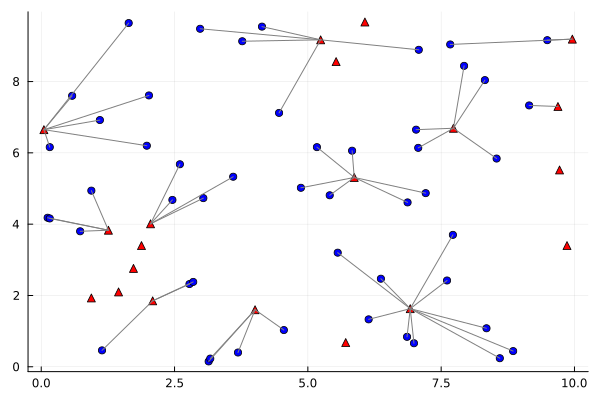

In [3]:
using DelimitedFiles 
dirInst = "datTI";            # Directorio con el archivo de la instancia Tarea Introductoria.

include("lab4-funcionalidad.jl");

util, costo, Fclt, Clnt = cargaInst(dirInst,"i001")
mdl, x = mdlUFL(util, costo)
optimize!(mdl)

if termination_status(mdl) == MOI.OPTIMAL                      
    println( "optimo = ", objective_value(mdl) )
    arcos = genArcos( value.(x), util )
    dibuja( Clnt, Fclt, arcos )
elseif termination_status(mdl) == MOI.INFEASIBLE
    println( "infactible" )
elseif termination_status(mdl) == MOI.DUAL_INFEASIBLE
    println( "no_acotado" )
end   


2b) Usando lo demostrado en el Ejercicio 1b), complete el código de la siguiente celda para que la función `zLR()`, dados:

* `mu[]` vector a coeficientes reales de dimensión $|\mathcal{C}|$ que representa los multiplicadores de Lagrance $\mu\in\mathbb{R}^{\mathcal C}$, y

* `util[]` y `costo[]` como en el Ejercicio 2a),

retorne el valor de $z_{LR}(\mu)$. 

In [5]:
function zLR(mu, util, costo)
    # Comenzar a completar código aquí.
    
    util_sum_term = sum(max.(util .- mu, 0), dims=1)
    first_term = sum(util_sum_term .- costo)
    second_term = sum(mu)

    return first_term + second_term
    # Terminar de completar código aquí.
end

zLR (generic function with 1 method)

Ejecute la siguiente celda para determinar el valor de $z_{LR}(\mu^0)$ para la instancia del Ejercicio 2a), donde $\mu^0$ es un valor inicial de los multiplicadores de Lagrange elegido de forma que $\mu^0_c$ sea el segundo mayor (sobre los $\ell\in\mathcal{L}$) valor de $u_{c,\ell}$.

**Nota:** La función `initMu()`, dado `util[]`, inicializa `mu[]` a $\mu^0$.

In [6]:
function initMu(util)
    # Dada la matriz de utilidad de UFL, retorna un vector de valores iniciales para 
    # la relajación lagrangiana LR(mu)
    cardC = size(util,1);

    mu = zeros(cardC);
    for c in 1:cardC
        mu[c] = (reverse(sort(util[c,:])))[2];
    end

    return mu
end

mu = initMu(util)
println( "zLR(mu) = ", zLR(mu, util, costo) )




zLR(mu) = 3025.555000000002


Observe que el valor obtenido para $z_{LR}(\mu^0)$ es bastante superior al óptimo $z_{UFL}$. En la parte presencial del laboratorio veremos como mejorar esta cota usando el algoritmo del subgradiente y como usar las cotas obtenidas junto con soluciones factibles para acelerar el método de *Branch & Bound* al aplicarlo a $(UFL)$.